In [17]:
%matplotlib inline

import torch
from src.CPPN1 import CPPN1

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from torchvision.utils import save_image


In [18]:
device = 'cuda'
num_steps = 100000
batch_size = 41216
learn_rate = 0.001
momentum = 0.9
num_channels = 3
image_shape = (512, 644)

In [19]:
target_im_path = 'im_000078.png'
target_im = Image.open(target_im_path).convert('RGB')
# resized_im = target_im.resize(image_shape)
# resized_im

In [20]:
def get_normalised_coordinate_grid(image_shape):
    width = np.linspace(-1, 1, image_shape[0])
    height = np.linspace(-1, 1, image_shape[1])
    mgrid = np.stack(np.meshgrid(width, height), axis=-1)
    mgrid = np.reshape(mgrid, [-1, 2])
    return mgrid

In [21]:
all_xy_coordinates = get_normalised_coordinate_grid(image_shape) 
all_xy_coordinates = torch.tensor(all_xy_coordinates, device=device, dtype=torch.float32)
print(f'coordinate grid shape: {all_xy_coordinates.shape}')
print(f'coordinate grid data: \n {all_xy_coordinates}')

coordinate grid shape: torch.Size([329728, 2])
coordinate grid data: 
 tensor([[-1.0000, -1.0000],
        [-0.9961, -1.0000],
        [-0.9922, -1.0000],
        ...,
        [ 0.9922,  1.0000],
        [ 0.9961,  1.0000],
        [ 1.0000,  1.0000]], device='cuda:0')


In [22]:
cppn = CPPN1()
cppn.load_state_dict(torch.load('Checkpoints/CPPNsquared_output.pt'))
cppn.to(device)
cppn.requires_grad_()


CPPN1(
  (fc1): Linear(in_features=2, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fce1): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=3, bias=True)
)

In [23]:
with torch.no_grad():
    prediction = cppn(all_xy_coordinates)
print(prediction)

tensor([[0.4941, 0.5031, 0.6389],
        [0.4941, 0.5031, 0.6387],
        [0.4942, 0.5031, 0.6385],
        ...,
        [0.4916, 0.5005, 0.6688],
        [0.4916, 0.5005, 0.6690],
        [0.4916, 0.5005, 0.6692]], device='cuda:0')


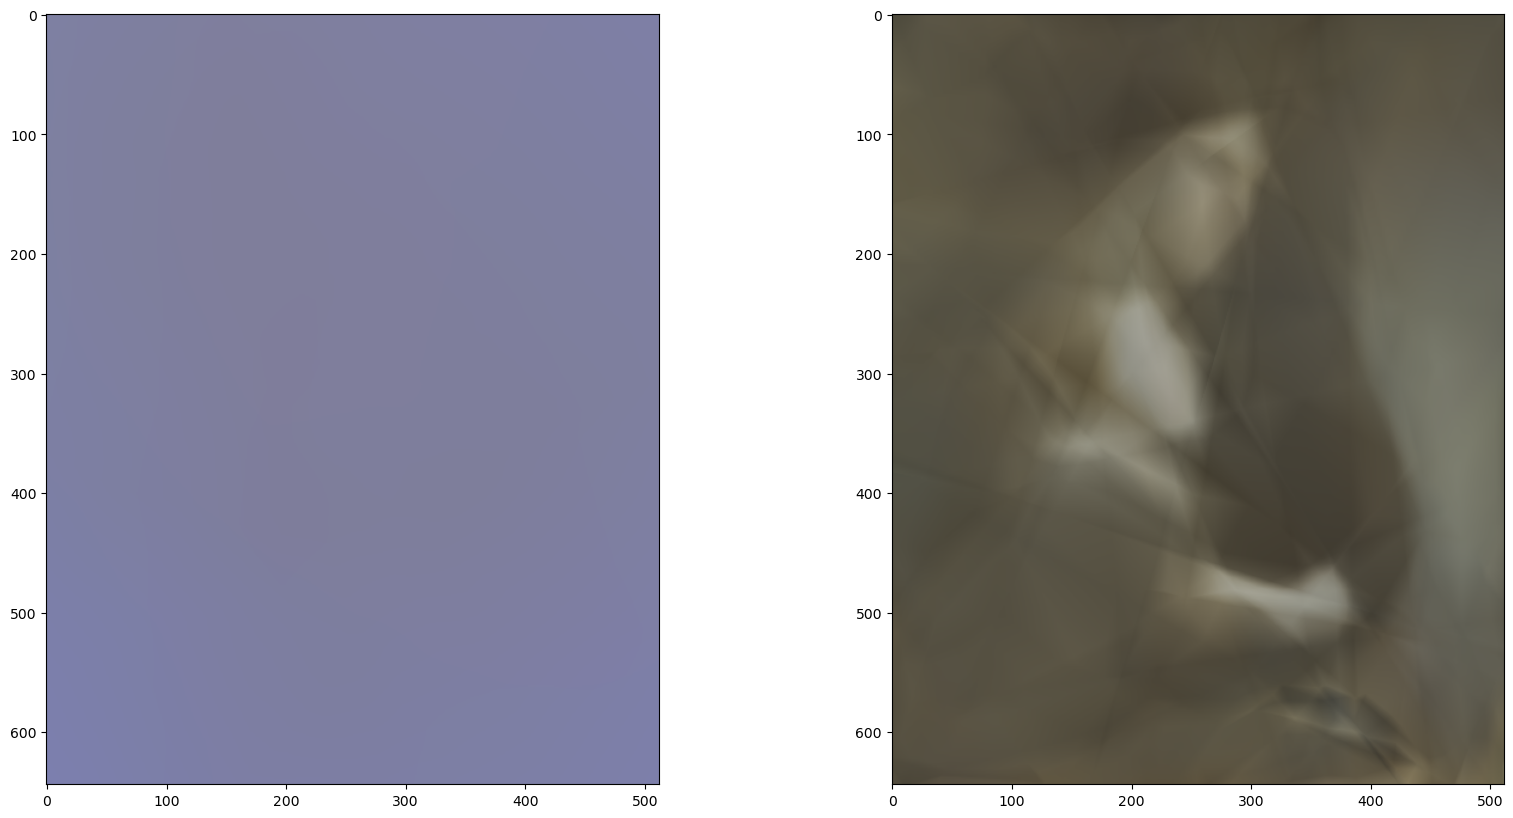

In [24]:

reconstructed_img = np.reshape(prediction.cpu(), (image_shape[1], image_shape[0], num_channels))
reconstructed_img *= 255
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)

fig, axes_array = plt.subplots(1,2, figsize=(20,10))
axes_array[0].imshow(reconstructed_img)
axes_array[1].imshow(target_im)

plt.show()